# CONTENT AND CONTEXT:

* A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

* This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

* The whole data divided to train and test.



Note:
* The dataset is imbalanced.
 Most features are categorical (Nominal, Ordinal, Binary), some with high   cardinality.
 Missing imputation can be a part of your pipeline as well.

# Input Features

* enrollee_id : Unique ID for candidate

* city: City code

* city_ development _index : Developement index of the city (scaled)

* gender: Gender of candidate

* relevent_experience: Relevant experience of candidate

* enrolled_university: Type of University course enrolled if any

* education_level: Education level of candidate

* major_discipline :Education major discipline of candidate

* experience: Candidate total experience in years

* company_size: No of employees in current employer's company

* company_type : Type of current employer

* last_new_job: Difference in years between previous job and current job

* training_hours: training hours completed

* target: 0 – Not looking for job change, 1 – Looking for a job change
# Inspiration :
Predict the probability of a candidate will work for the company
Interpret model(s) such a way that illustrate which features affect candidate decision

# TRAINING DATA

IMPORTING SUFFICIENT LIBRARIES

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/HR_kaggle1_project_train.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [ ]:
# Number of Rows and Columns
df.shape

(19158, 14)

In [ ]:
# Information on features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
# check mathematic relation of the data
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [ ]:
# each column types
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

# DATA EXPLORATION

In [ ]:
gender_count=df['gender'].value_counts()
gender_count

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

PIE CHART FOR GENDER

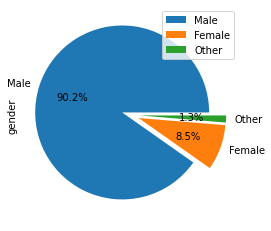

In [ ]:
gender_count.plot(kind='pie',explode=(0.1,0.1,0.1),autopct='%1.1f%%')
plt.legend()

COUNT PLOT FOR GENDER

<Axes: xlabel='gender', ylabel='count'>

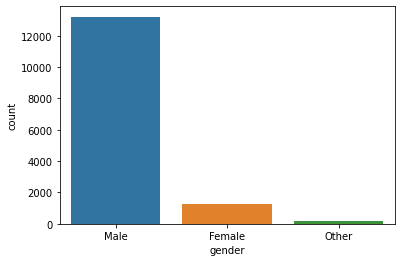

In [ ]:
sns.countplot(x=df['gender'])

In [ ]:
rel_exp=df['relevent_experience'].value_counts()
rel_exp

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

PIE CHART FOR RELEVENT EXPERIENCE

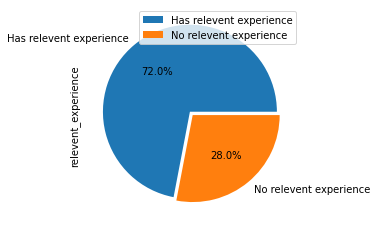

In [ ]:
rel_exp.plot(kind='pie',explode=(0.05,0,),autopct='%1.1f%%')
plt.legend(loc='upper right')

COUNT PLOT FOR RELEVENT EXPERIENCE

<Axes: xlabel='relevent_experience', ylabel='count'>

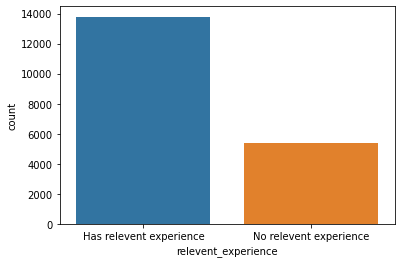

In [ ]:
sns.countplot(x=df['relevent_experience'])

In [ ]:
edu_lev=df['education_level'].value_counts()
edu_lev

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

PIE CHART FOR EDUCATION LEVEL

<Axes: ylabel='education_level'>

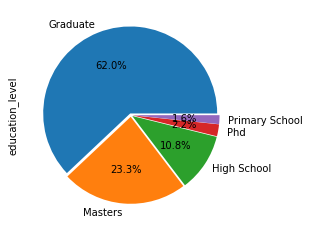

In [ ]:
edu_lev.plot(kind='pie',explode=(0.02,0.02,0.02,0.02,0.02),autopct='%1.1f%%')

COUNT PLOT FOR EDUCATION LEVEL

<Axes: xlabel='education_level', ylabel='count'>

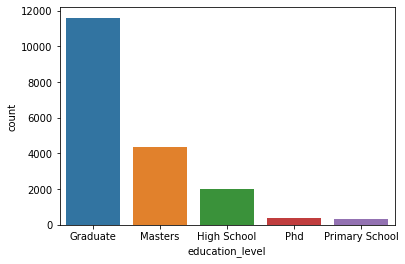

In [ ]:
sns.countplot(x=df['education_level'])

In [ ]:
enro_uni=df['enrolled_university'].value_counts()
enro_uni

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

PIE CHART FOR ENROLLED UNIVERSITY

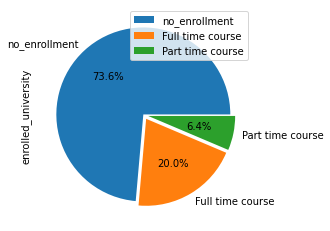

In [ ]:
enro_uni.plot(kind='pie',explode=(0.01,0.05,0.05),autopct='%1.1f%%')
plt.legend()

COUNT PLOT FOR ENROLLED UNIVERSITY

<Axes: xlabel='enrolled_university', ylabel='count'>

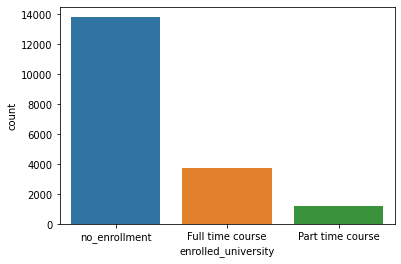

In [ ]:
sns.countplot(x=df['enrolled_university'])

In [ ]:
maj_dis=df['major_discipline'].value_counts()
maj_dis

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

PIE CHART FOR MAJOR DISCIPLINE

<Axes: ylabel='major_discipline'>

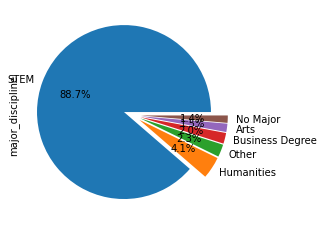

In [ ]:
maj_dis.plot(kind='pie',explode=(0.1,0.1,0.1,0.1,0.1,0.1),autopct='%1.1f%%')

COUNT PLOT FOR MAJOR DISCIPLINE

<Axes: xlabel='major_discipline', ylabel='count'>

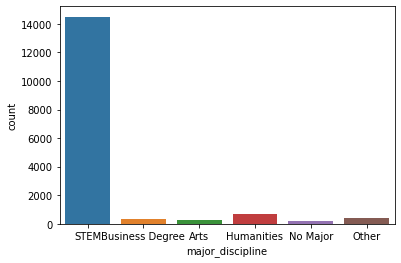

In [ ]:
sns.countplot(x=df['major_discipline'])

In [ ]:
exp=df['experience'].value_counts()
exp

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

PIE CHART FOR EXPERIENCE

<Axes: ylabel='experience'>

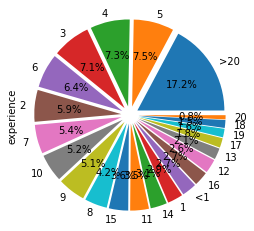

In [ ]:
exp.plot(kind='pie',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1),autopct='%1.1f%%')


COUNT PLOT FOR EXPERIENCE

<Axes: xlabel='experience', ylabel='count'>

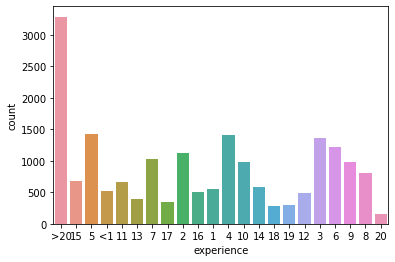

In [ ]:
sns.countplot(x=df['experience'])

In [ ]:
comp_size=df['company_size'].value_counts()
comp_size

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

PIE CHART FOR COMPANY SIZE

<Axes: ylabel='company_size'>

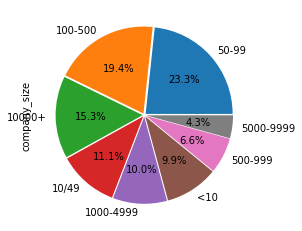

In [ ]:
comp_size.plot(kind='pie',explode=(0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02),autopct='%1.1f%%')

COUNT PLOT FOR COMPANY SIZE

<Axes: xlabel='company_size', ylabel='count'>

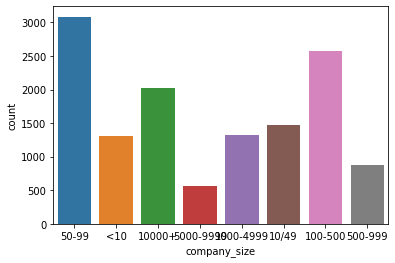

In [ ]:
sns.countplot(x=df['company_size'])

In [ ]:
comp_type=df['company_type'].value_counts()
comp_type

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

PIE CHART FOR COMPANY TYPE

<Axes: ylabel='company_type'>

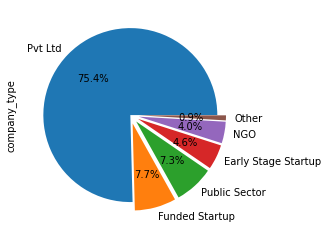

In [ ]:
comp_type.plot(kind='pie',explode=(0,0.1,0.1,0.1,0.1,0.1),autopct='%1.1f%%')

COUNT PLOT FOR COMPANY PLOT


<Axes: xlabel='company_type', ylabel='count'>

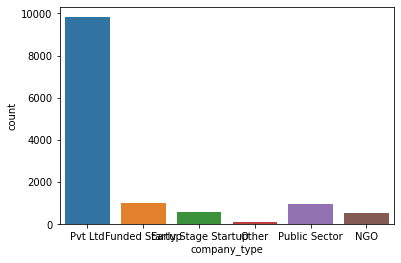

In [ ]:
sns.countplot(x=df['company_type'])

In [ ]:
last_nj=df['last_new_job'].value_counts()
last_nj

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

PIE CHART FOR LAST NEW JOB

<Axes: ylabel='last_new_job'>

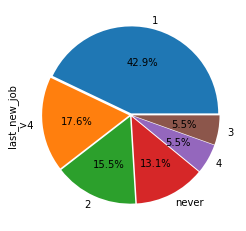

In [ ]:
last_nj.plot(kind='pie',explode=(0.02,0.02,0.02,0.02,0.02,0.02),autopct='%1.1f%%')

COUNT PLOT FOR LAST NEW JOB

<Axes: xlabel='last_new_job', ylabel='count'>

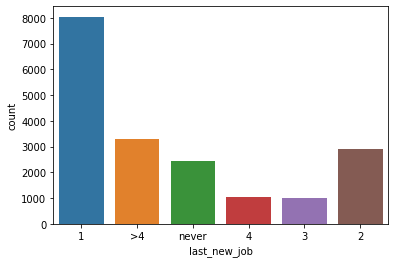

In [ ]:
sns.countplot(x=df['last_new_job'])

In [ ]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

## **REPLACING THE CATEGORICAL DATA **

In [ ]:
# filling missing values with most frequent data

df['gender'].fillna(df['gender'].mode()[0],inplace=True)

df['enrolled_university'].fillna(df['enrolled_university'].mode()[0],inplace=True)

df['education_level'].fillna(df['education_level'].mode()[0],inplace=True)

df['major_discipline'].fillna(df['major_discipline'].mode()[0],inplace=True)

df['company_size'].fillna(df['company_size'].mode()[0],inplace=True)

df['company_type'].fillna(df['company_type'].mode()[0],inplace=True)

In [ ]:
# replacing '<1' , '>20' string values to '0' , '21' and converting them to float

df['experience'].replace(['<1','>20',],['0','21'],inplace=True)
df['experience']=df['experience'].astype(float)
df['experience'].fillna(df['experience'].mode()[0],inplace=True)

In [ ]:
# replacing '>4' ,'never' string values to '5' ,'0' and converting them to float

df['last_new_job'].replace(['>4','never'],['5','0'],inplace=True)
df['last_new_job']=df['last_new_job'].astype(float)
df['last_new_job'].fillna(df['last_new_job'].mode()[0],inplace=True)

In [ ]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                float64
company_size               object
company_type               object
last_new_job              float64
training_hours              int64
target                    float64
dtype: object

In [ ]:
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# PLOTTING 

In [ ]:
import seaborn as sns
df.corr()

,enrollee_id,city_development_index,experience,last_new_job,training_hours,target
enrollee_id,1.000000,-0.040455,-0.036000,-0.027580,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.329124,0.191410,0.001920,-0.341665
experience,-0.036000,0.329124,1.000000,0.474052,0.001479,-0.174256
last_new_job,-0.027580,0.191410,0.474052,1.000000,-0.004949,-0.084607
training_hours,0.000998,0.001920,0.001479,-0.004949,1.000000,-0.021577
target,0.049475,-0.341665,-0.174256,-0.084607,-0.021577,1.000000


# HEAT MAP

<Axes: >

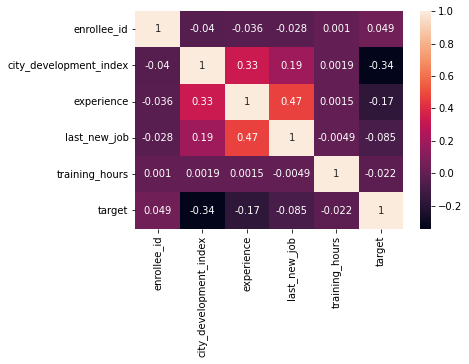

In [ ]:
sns.heatmap(df.corr(),annot=True)

# JOINT PLOT

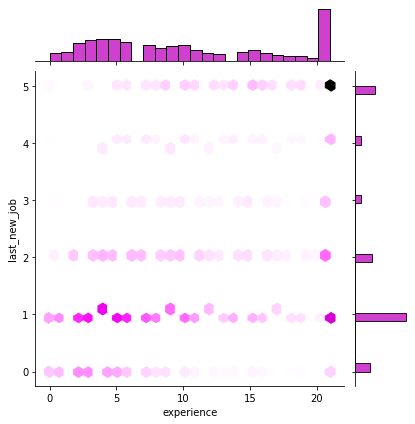

In [ ]:
sns.jointplot(x='experience',y='last_new_job',data=df,color='m',kind='hex')

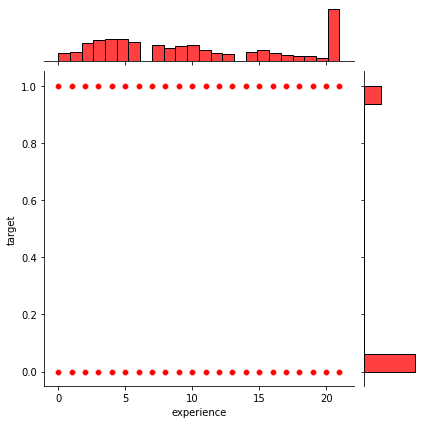

In [ ]:
sns.jointplot(x='experience',y='target',data=df,color='r')

# PAIR PLOT

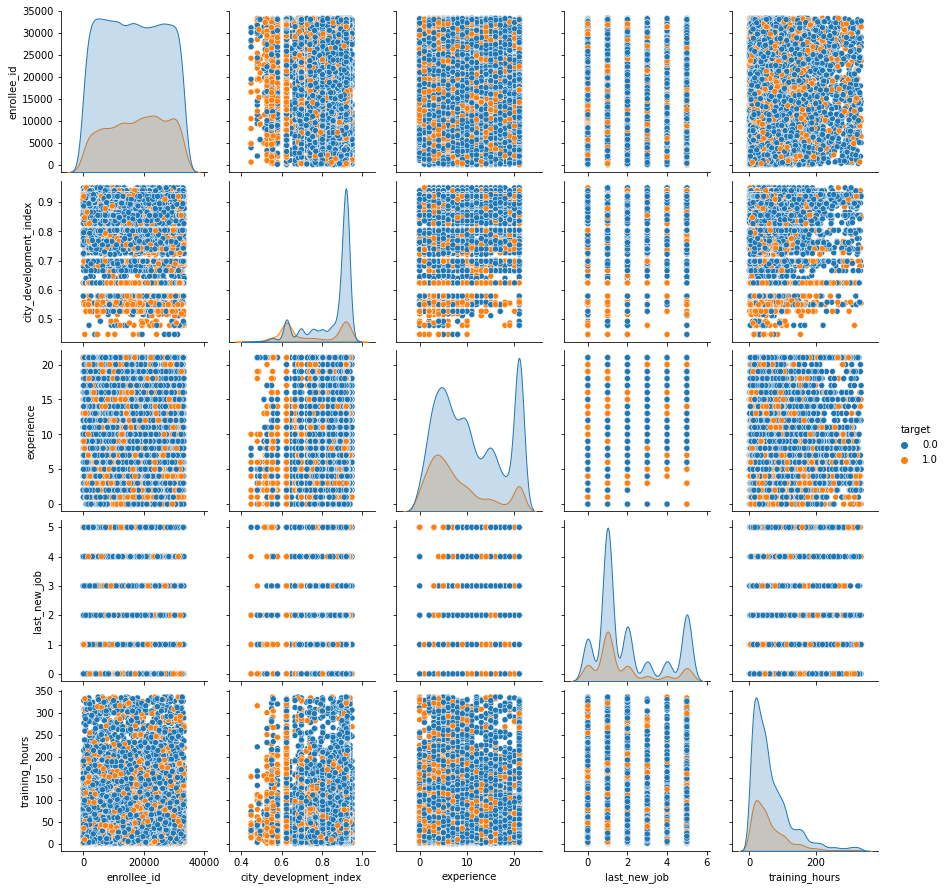

In [ ]:
sns.pairplot(data=df,hue='target')

# BAR PLOT

<Axes: xlabel='education_level', ylabel='experience'>

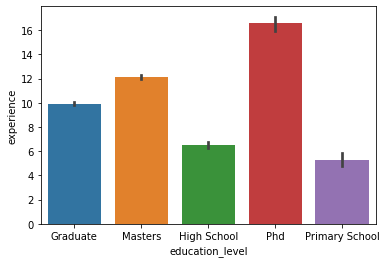

In [ ]:
sns.barplot(x='education_level',y='experience',data=df)

<Axes: xlabel='gender', ylabel='experience'>

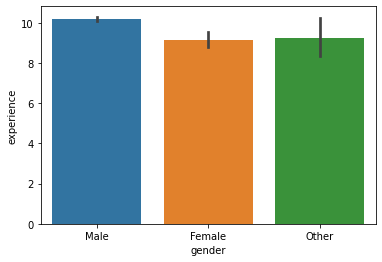

In [ ]:
sns.barplot(x='gender',y='experience',data=df)

BOX PLOT

<Axes: xlabel='education_level', ylabel='experience'>

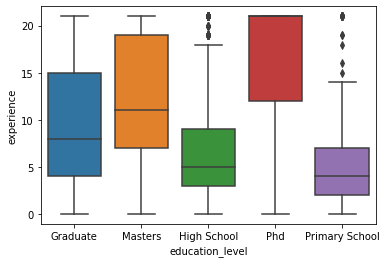

In [ ]:
sns.boxplot(x='education_level',y='experience',data=df)

<Axes: xlabel='major_discipline', ylabel='experience'>

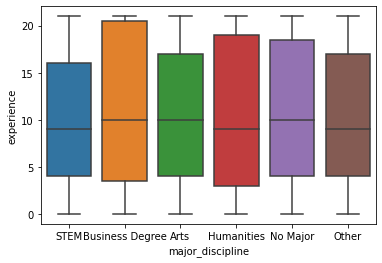

In [ ]:
sns.boxplot(x='major_discipline',y='experience',data=df)

# HIST PLOT

<Axes: xlabel='experience', ylabel='Count'>

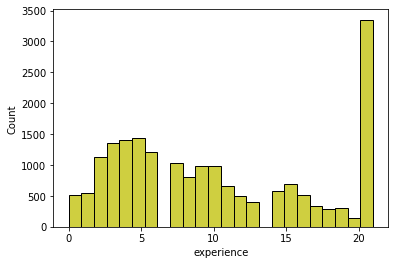

In [ ]:
sns.histplot(x='experience',data=df,color='y')

<Axes: xlabel='training_hours', ylabel='Count'>

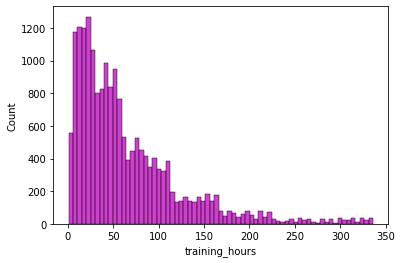

In [ ]:
sns.histplot(x='training_hours',data=df,color='m')

# LINE PLOT

<Axes: xlabel='experience', ylabel='training_hours'>

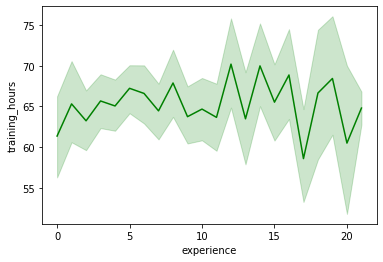

In [ ]:
sns.lineplot(x='experience',y='training_hours',data=df,color='g')

<Axes: xlabel='training_hours', ylabel='last_new_job'>

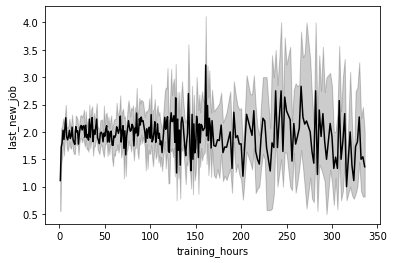

In [ ]:
sns.lineplot(x='training_hours',y='last_new_job',data=df,color='k')

# SCATTER PLOT

<Axes: xlabel='training_hours', ylabel='experience'>

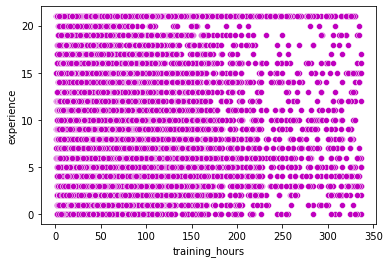

In [ ]:
sns.scatterplot(x='training_hours',y='experience',data=df,color='m')

# ENCODING

In [ ]:
#encoding ==> ( gender	relevent_experience	enrolled_university	education_level	major_discipline company_size	company_type  )
enco1=pd.get_dummies(df[['gender','relevent_experience','enrolled_university','education_level','major_discipline','company_size','company_type']],drop_first=True)
enco1

,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,...,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
19154,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
19155,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
19156,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
enco1.columns

Index(['gender_Male', 'gender_Other',
       'relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_High School',
       'education_level_Masters', 'education_level_Phd',
       'education_level_Primary School', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM',
       'company_size_100-500', 'company_size_1000-4999', 'company_size_10000+',
       'company_size_50-99', 'company_size_500-999', 'company_size_5000-9999',
       'company_size_<10', 'company_type_Funded Startup', 'company_type_NGO',
       'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd'],
      dtype='object')

CONCATENATION

In [ ]:
x_train=pd.concat([df,enco1],axis=1)
x_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,50-99,...,0,1,0,0,0,0,0,0,0,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,...,0,1,0,0,0,0,0,0,0,1
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,50-99,...,0,1,0,0,0,0,0,0,0,1
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0.0,50-99,...,0,1,0,0,0,0,0,0,0,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,50-99,...,0,1,0,0,0,0,0,0,0,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,50-99,...,0,1,0,0,0,0,0,0,0,1
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,50-99,...,0,1,0,0,0,0,0,0,0,1
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,0.0,500-999,...,0,0,1,0,0,0,0,0,0,1


DROPPING COLUMNS AND SEPERATING X AND Y

In [ ]:
x_train=x_train.drop({'enrollee_id','city','gender','relevent_experience','enrolled_university','education_level','major_discipline','company_size','company_type','target'},axis=1)
x_train

,city_development_index,experience,last_new_job,training_hours,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,...,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,21.0,1.0,36,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0.776,15.0,5.0,47,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,0.624,5.0,0.0,83,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0.789,0.0,0.0,52,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,0.767,21.0,4.0,8,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,14.0,1.0,42,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
19154,0.920,14.0,4.0,52,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
19155,0.920,21.0,4.0,44,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
19156,0.802,0.0,2.0,97,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
y_train=df['target']
y_train

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 19158, dtype: float64

# **TESTING DATA**.
######################################

















In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/HR_kaggle1_project_test')
df1

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21,0
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98,0
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15,0
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Oct-49,Pvt Ltd,1,39,0
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,0
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,0
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18,0
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
 13  target                  2129 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memo

In [ ]:
df1.describe()

,enrollee_id,city_development_index,training_hours,target
count,2129.000000,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091,0.182715
std,9576.846029,0.125074,60.238660,0.386523
min,3.000000,0.448000,1.000000,0.000000
25%,8562.000000,0.698000,23.000000,0.000000
50%,16816.000000,0.903000,47.000000,0.000000
75%,25129.000000,0.920000,86.000000,0.000000
max,33353.000000,0.949000,334.000000,1.000000


In [ ]:
df1.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
target                      0
dtype: int64

In [ ]:
df1.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [ ]:
df1['city'].value_counts()

city_103    473
city_21     318
city_16     168
city_114    155
city_160    113
           ... 
city_179      1
city_39       1
city_139      1
city_31       1
city_78       1
Name: city, Length: 108, dtype: int64

In [ ]:
df1['gender'].value_counts()

Male      1460
Female     137
Other       24
Name: gender, dtype: int64

In [ ]:
df1['relevent_experience'].value_counts()

Has relevent experience    1524
No relevent experience      605
Name: relevent_experience, dtype: int64

In [ ]:
df1['enrolled_university'].value_counts()

no_enrollment       1519
Full time course     435
Part time course     144
Name: enrolled_university, dtype: int64

In [ ]:
df1['education_level'].value_counts()   

Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
Name: education_level, dtype: int64

In [ ]:
df1['major_discipline'].value_counts()

STEM               1621
Humanities           80
Other                40
Business Degree      37
No Major             22
Arts                 17
Name: major_discipline, dtype: int64

In [ ]:
df1['experience'].value_counts()

>20    383
5      163
3      154
4      145
6      130
2      128
7      116
9      113
10      96
11      86
8       82
<1      74
16      68
15      59
1       56
14      55
13      54
12      52
17      36
19      29
18      26
20      19
Name: experience, dtype: int64

In [ ]:
df1['company_size'].value_counts()

50-99        338
100-500      318
10000+       217
Oct-49       172
<10          163
1000-4999    143
500-999       88
5000-9999     68
Name: company_size, dtype: int64

In [ ]:
df1['company_type'].value_counts()

Pvt Ltd                1141
Public Sector           127
Funded Startup           97
Early Stage Startup      65
NGO                      53
Other                    12
Name: company_type, dtype: int64

In [ ]:
df1['last_new_job'].value_counts()

1        884
>4       353
2        342
never    258
3        133
4        119
Name: last_new_job, dtype: int64

# PREPROCESSING THE TESTING DATA

In [ ]:
# filling missing values with most frequent data

df1['gender'].fillna(df1['gender'].mode()[0],inplace=True)

df1['enrolled_university'].fillna(df1['enrolled_university'].mode()[0],inplace=True)

df1['education_level'].fillna(df1['education_level'].mode()[0],inplace=True)

df1['major_discipline'].fillna(df1['major_discipline'].mode()[0],inplace=True)

df1['company_type'].fillna(df1['company_type'].mode()[0],inplace=True)

In [ ]:
# replacing '<1' , '>20' string values to '0' , '21' and convert it to float

df1['experience'].replace(['<1','>20',],['0','21'],inplace=True)
df1['experience']=df1['experience'].astype(float)
df1['experience'].replace(np.NaN,0,inplace=True)

In [ ]:
# replacing '>4' , 'never' string values to '5' , '0' and convert it to float

df1['last_new_job'].replace(['>4','never'],['5','0'],inplace=True)
df1['last_new_job']=df1['last_new_job'].astype(float)
df1['last_new_job'].fillna(df1['last_new_job'].mode()[0],inplace=True)

In [ ]:
# replacing 'Oct-49', '10/49' as the training data is having '10/49' in it

df1['company_size'].replace(['Oct-49'],['10/49'],inplace=True)
df1['company_size'].fillna(df1['company_size'].mode()[0],inplace=True)


In [ ]:
df1.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# ENCODING TESTING VALUES

In [ ]:
enco2=pd.get_dummies(df1[['gender','relevent_experience','enrolled_university','education_level','major_discipline','company_size','company_type']],drop_first=True)
enco2

,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,...,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2125,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2126,1,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2127,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# CONCATENATION

In [ ]:
x_test=pd.concat([df1,enco2],axis=1)
x_test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9.0,<10,...,0,0,0,0,1,0,0,0,0,1
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5.0,50-99,...,0,1,0,0,0,0,0,0,0,1
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,STEM,0.0,50-99,...,0,1,0,0,0,0,0,0,0,1
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11.0,10/49,...,0,0,0,0,0,0,0,0,0,1
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,10000+,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16.0,50-99,...,0,1,0,0,0,0,0,0,1,0
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18.0,50-99,...,0,1,0,0,0,0,0,0,0,1
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,STEM,3.0,50-99,...,0,1,0,0,0,0,0,0,0,1
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,STEM,7.0,100-500,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y_test=df1['target']
y_test

0       0
1       0
2       0
3       0
4       0
       ..
2124    0
2125    0
2126    0
2127    0
2128    0
Name: target, Length: 2129, dtype: int64

In [ ]:
x_test=x_test.drop({'enrollee_id','city','gender','relevent_experience','enrolled_university','education_level','major_discipline','company_size','company_type','target'},axis=1)	
x_test

,city_development_index,experience,last_new_job,training_hours,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,...,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.827,9.0,1.0,21,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0.920,5.0,1.0,98,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,0.624,0.0,0.0,15,1,0,1,0,1,1,...,0,1,0,0,0,0,0,0,0,1
3,0.827,11.0,1.0,39,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0.920,21.0,5.0,72,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,0.920,16.0,4.0,15,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2125,0.897,18.0,2.0,30,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2126,0.887,3.0,0.0,18,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2127,0.804,7.0,1.0,84,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
x_test.columns

Index(['city_development_index', 'experience', 'last_new_job',
       'training_hours', 'gender_Male', 'gender_Other',
       'relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_High School',
       'education_level_Masters', 'education_level_Phd',
       'education_level_Primary School', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM',
       'company_size_100-500', 'company_size_1000-4999', 'company_size_10000+',
       'company_size_50-99', 'company_size_500-999', 'company_size_5000-9999',
       'company_size_<10', 'company_type_Funded Startup', 'company_type_NGO',
       'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd'],
      dtype='object')

# MODEL CREATION

DECISIONTREE 

DecisionTreeClassifier
score is: 0.7994363550962893
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1740
           1       0.46      0.62      0.53       389

    accuracy                           0.80      2129
   macro avg       0.69      0.73      0.70      2129
weighted avg       0.83      0.80      0.81      2129

****************************************************************************************************


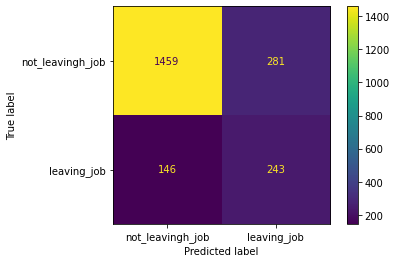

In [ ]:
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('DecisionTreeClassifier')
print("score is:",accuracy_score(y_pred,y_test))
print('*'*100)
print(classification_report(y_test,y_pred))
print('*'*100)
result=confusion_matrix(y_test,y_pred)
cmd=['not_leavingh_job','leaving_job']
cm=ConfusionMatrixDisplay(result,display_labels=cmd)
cm.plot()

# **RANDOM FOREST MODEL ===> HIGHEST ACCURACY SCORE **

RandomForestClassifier()
****************************************************************************************************
Accuracy score 0.9553781117895725
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1740
           1       0.88      0.88      0.88       389

    accuracy                           0.96      2129
   macro avg       0.93      0.92      0.93      2129
weighted avg       0.96      0.96      0.96      2129

****************************************************************************************************


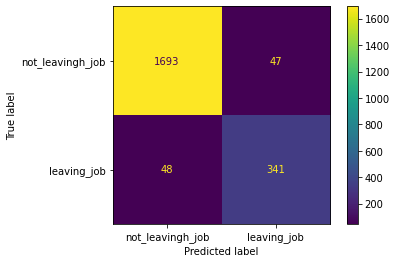

In [ ]:
# bagging (ensemble model >> bootstrat agrregation)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(model)
print('*'*100)
print("Accuracy score",accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred))
print('*'*100)
result=confusion_matrix(y_test,y_pred)
cm=ConfusionMatrixDisplay(result,display_labels=cmd)
cm.plot()

ADABOOST CLASSIFIER

AdaBoostClassifier()
****************************************************************************************************
Accuracy score is: 0.8637858149365899
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1740
           1       0.67      0.50      0.57       389

    accuracy                           0.86      2129
   macro avg       0.78      0.72      0.75      2129
weighted avg       0.85      0.86      0.86      2129

****************************************************************************************************


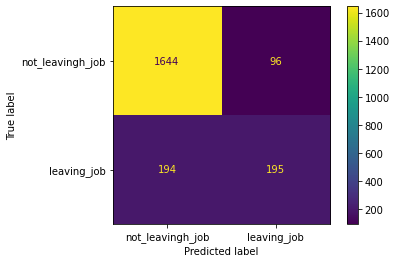

In [ ]:
# boosting (ensemble model uses sequentical technique)
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(model)
print('*'*100)
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('*'*100)
result=confusion_matrix(y_test,y_pred)
cm=ConfusionMatrixDisplay(result,display_labels=cmd)
cm.plot()

PREPROCESSING

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train

array([[ 0.73891926,  1.59866544, -0.58813481, ..., -0.0797248 ,
        -0.22904995,  0.44788572],
       [-0.42840976,  0.7156588 ,  1.81649341, ..., -0.0797248 ,
        -0.22904995,  0.44788572],
       [-1.66059039, -0.75601893, -1.18929186, ..., -0.0797248 ,
        -0.22904995,  0.44788572],
       ...,
       [ 0.73891926,  1.59866544,  1.21533635, ..., -0.0797248 ,
        -0.22904995,  0.44788572],
       [-0.21764202, -1.4918578 ,  0.01302225, ..., -0.0797248 ,
        -0.22904995,  0.44788572],
       [ 0.21199991, -1.19752225, -0.58813481, ..., -0.0797248 ,
        -0.22904995,  0.44788572]])

KNN

KNeighborsClassifier
score is: 0.8666040394551433
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1740
           1       0.65      0.59      0.62       389

    accuracy                           0.87      2129
   macro avg       0.78      0.76      0.77      2129
weighted avg       0.86      0.87      0.86      2129

****************************************************************************************************


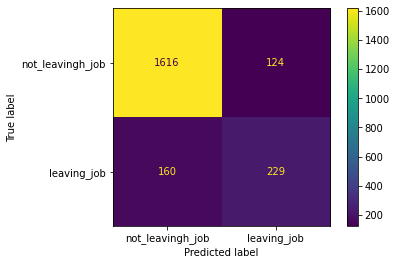

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('KNeighborsClassifier')
print("score is:",accuracy_score(y_pred,y_test))
print('*'*100)
print(classification_report(y_test,y_pred))
print('*'*100)
result=confusion_matrix(y_test,y_pred)
cm=ConfusionMatrixDisplay(result,display_labels=cmd)
cm.plot()


SVM

SVC()
score is: 0.8675434476279944
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1740
           1       0.71      0.47      0.56       389

    accuracy                           0.87      2129
   macro avg       0.80      0.71      0.74      2129
weighted avg       0.86      0.87      0.86      2129

****************************************************************************************************


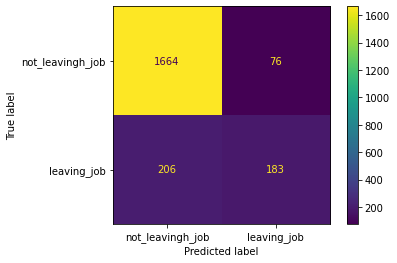

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(model)
print("score is:",accuracy_score(y_pred,y_test))
print('*'*100)
print(classification_report(y_test,y_pred))
print('*'*100)
result=confusion_matrix(y_test,y_pred)
cm=ConfusionMatrixDisplay(result,display_labels=cmd)
cm.plot()

GaussianNB
accuracy score is: 0.660403945514326
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.94      0.62      0.75      1740
           1       0.33      0.82      0.47       389

    accuracy                           0.66      2129
   macro avg       0.63      0.72      0.61      2129
weighted avg       0.83      0.66      0.70      2129

****************************************************************************************************


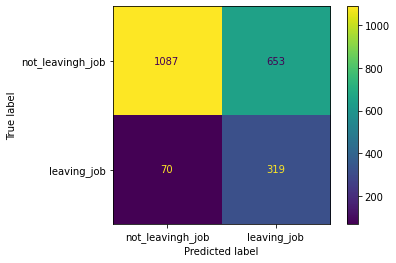

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('GaussianNB')
print("accuracy score is:",accuracy_score(y_pred,y_test))
print('*'*100)
print(classification_report(y_test,y_pred))
print('*'*100)
result=confusion_matrix(y_test,y_pred)
cm=ConfusionMatrixDisplay(result,display_labels=cmd)
cm.plot()
